# Множественная классификация снимков КТ грудной клетки


Источник данных: https://www.kaggle.com/mohamedhanyyy/chest-ctscan-images


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras.datasets import cifar10, cifar100
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.utils import image_dataset_from_directory, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from PIL import Image

# Загрузка train, test, valid datasets

In [ ]:
batch_size = 256
image_size = (200,300)

In [ ]:
train_dataset = image_dataset_from_directory('/content/drive/MyDrive/Demo projects/Data/train', batch_size=batch_size, image_size=image_size)

Found 613 files belonging to 4 classes.


In [ ]:
test_dataset = image_dataset_from_directory('/content/drive/MyDrive/Demo projects/Data/test', batch_size=batch_size, image_size=image_size)

Found 315 files belonging to 4 classes.


In [ ]:
valid_dataset = image_dataset_from_directory('/content/drive/MyDrive/Demo projects/Data/valid', batch_size=batch_size, image_size=image_size)

Found 72 files belonging to 4 classes.


# Визуализируем несколько изображений:

In [ ]:
class_names = train_dataset.class_names

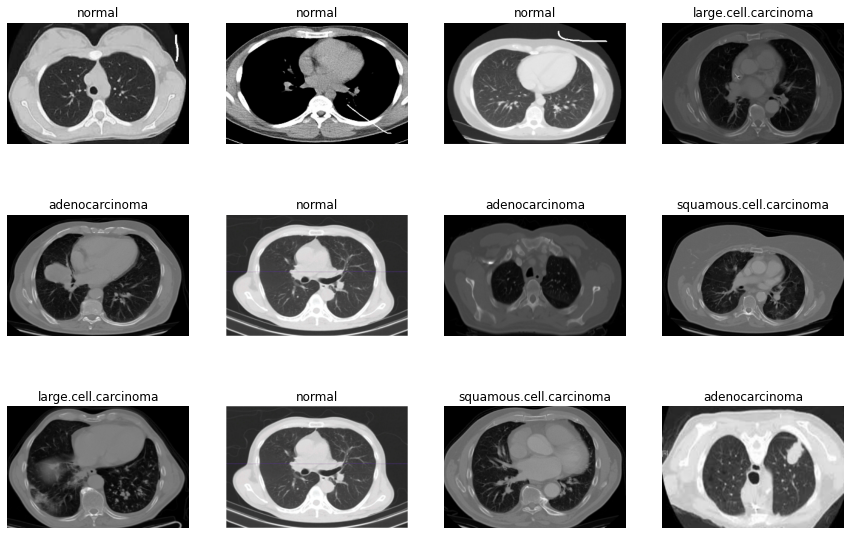

In [ ]:
plt.figure(figsize=(15,10))
for image, labels in train_dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

# Архитектура нейронной сети

In [135]:
model = Sequential()

model.add(Conv2D(16, (10, 10), padding='same', input_shape=(200, 300, 3), activation='relu')) # Первый сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same')) # Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same')) # Третий сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same')) # Четвертый сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2)))

# Полносвязные слои
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax')) # Выходной слой, 4 нейрона по количеству классов

In [136]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# Обучение и проверка качества нейронной сети:

In [137]:
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=20, verbose=2)

Epoch 1/20
3/3 - 12s - loss: 141.9605 - accuracy: 0.2577 - val_loss: 8.0743 - val_accuracy: 0.1806 - 12s/epoch - 4s/step
Epoch 2/20
3/3 - 6s - loss: 4.7171 - accuracy: 0.2545 - val_loss: 1.3640 - val_accuracy: 0.1806 - 6s/epoch - 2s/step
Epoch 3/20
3/3 - 6s - loss: 1.3470 - accuracy: 0.2741 - val_loss: 1.3584 - val_accuracy: 0.3611 - 6s/epoch - 2s/step
Epoch 4/20
3/3 - 6s - loss: 1.3212 - accuracy: 0.3948 - val_loss: 1.3176 - val_accuracy: 0.3333 - 6s/epoch - 2s/step
Epoch 5/20
3/3 - 6s - loss: 1.2519 - accuracy: 0.3915 - val_loss: 1.3006 - val_accuracy: 0.4167 - 6s/epoch - 2s/step
Epoch 6/20
3/3 - 6s - loss: 1.1595 - accuracy: 0.4796 - val_loss: 1.1445 - val_accuracy: 0.5000 - 6s/epoch - 2s/step
Epoch 7/20
3/3 - 6s - loss: 1.0075 - accuracy: 0.5808 - val_loss: 0.9258 - val_accuracy: 0.5833 - 6s/epoch - 2s/step
Epoch 8/20
3/3 - 6s - loss: 0.8326 - accuracy: 0.6444 - val_loss: 0.7984 - val_accuracy: 0.6667 - 6s/epoch - 2s/step
Epoch 9/20
3/3 - 6s - loss: 0.7365 - accuracy: 0.6688 - val_

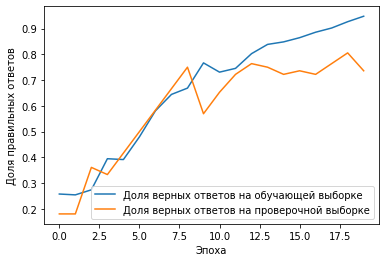

In [138]:
plt.plot(history.history['accuracy'], label = 'Доля верных ответов на обучающей выборке')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [141]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(test_dataset, verbose=1)

2/2 [==============================] - 2s 103ms/step - loss: 1.9290 - accuracy: 0.5746


In [142]:
print("Доля верных ответов на тестовых данных, %:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 57.4603


# Классификация снимка:

In [155]:
img_path = '/content/drive/MyDrive/Demo projects/KT_predict.jpg'

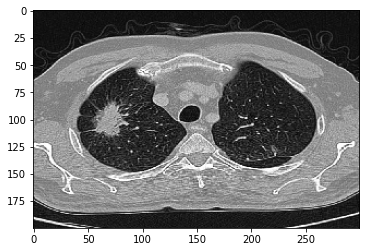

In [156]:
img = image.load_img(img_path, target_size=(200,300))
plt.imshow(img)
plt.show()

In [157]:
#преобразуем изображение в массив
x = image.img_to_array(img)
x.shape

(200, 300, 3)

In [161]:
x = np.expand_dims(x, axis=0) #добавляем необходимую размерность для предикта

In [162]:
#predict
prediction = model.predict(x)
np.argmax(prediction)

1

In [163]:
class_names

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']